# DRUG CLASSIFICATION


## Data Analysis & Modelling
#### by :Adarsh Dhiman 
#### BCA 5th 
#### Univ rollno. 1919606

In [158]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [159]:
import missingno as msno

In [160]:
drugs_df = pd.read_csv('drug200.csv')
drugs_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [161]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [162]:
drugs_df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [164]:
drugs_df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [165]:
drugs_df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [94]:
drugs_df.shape

(200, 6)

In [95]:
drugs_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [96]:
drugs_df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [97]:
drugs_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [98]:
#generic functions to calculate the missing value 
def calcMissingValues(df:pd.DataFrame):
    #calculate zero values 
    zero_values = (df ==0.0).astype(int).sum(axis=0)
    #calculate missing values 
    missing_vals = df.isnull().sum()
    missing_val_percent = round((missing_vals/len(df))*100.0 , 2)
    df_missing_stat = pd.concat([zero_values,missing_vals ,missing_val_percent],axis=1)
    df_missing_stat = df_missing_stat.rename(columns ={0: 'zero_values',1: 'missing_vals',2: '%_missing_vals'})
    df_missing_stat['data_types'] = df.dtypes
    print(df_missing_stat)

In [99]:
calcMissingValues(drugs_df)

             zero_values  missing_vals  %_missing_vals data_types
Age                    0             0             0.0      int64
Sex                    0             0             0.0     object
BP                     0             0             0.0     object
Cholesterol            0             0             0.0     object
Na_to_K                0             0             0.0    float64
Drug                   0             0             0.0     object


###### Visualizing Age vs Arug type
######  strip plot
###### box plot

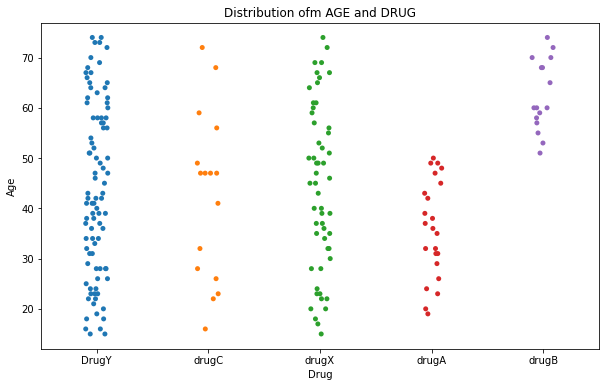

In [100]:
# visualize age and drug type using strip plot 
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Drug', y = 'Age' , data = drugs_df)
plt.title("Distribution ofm AGE and DRUG")
plt.show()

<Figure size 1440x720 with 0 Axes>

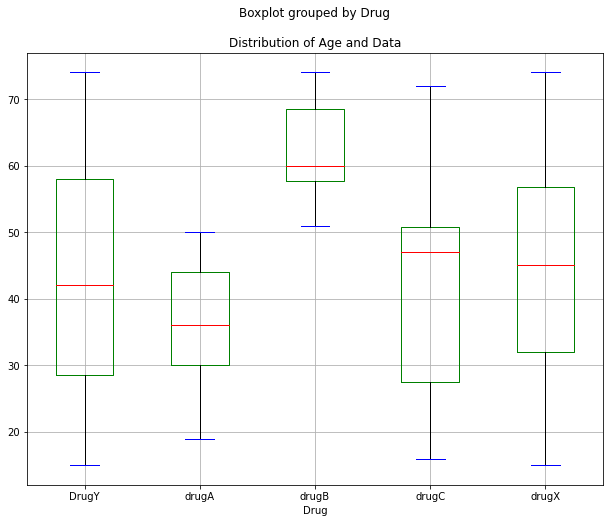

In [101]:
# visualizing age and drug using box plot 
plt.figure(figsize = (20,10))
props = dict(boxes= "green",whiskers = "black", medians ="red", caps="blue")
drugs_df.boxplot(by = 'Drug' , column = ['Age'], figsize = (10,8),color = props)
plt.title("Distribution of Age and Data")
plt.show()

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


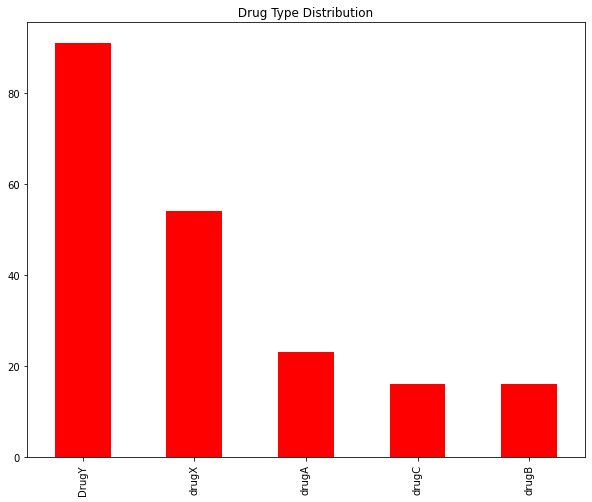

In [102]:
# get unique class values 
print (drugs_df['Drug'].unique())
# plot a bar chart for various classes
drugs_df['Drug'].value_counts().plot(kind = 'bar' , x = ' Drug Type', y = ' Drug Type Count',color = "red" , figsize =(10,8))
plt.title(' Drug Type Distribution ')
plt.show()   


#### Pie chart 

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
dtype: int64


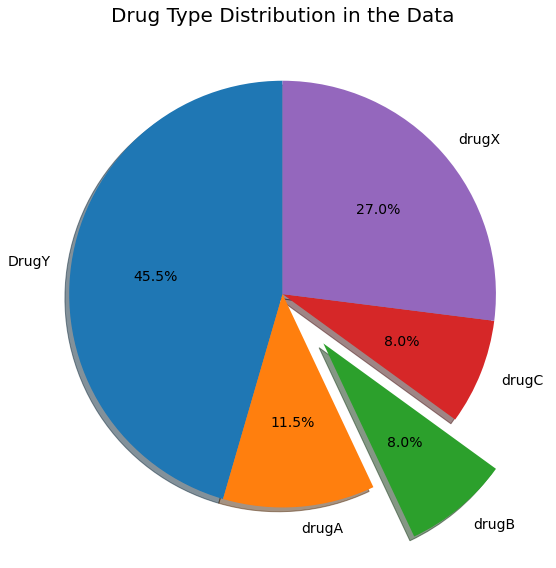

In [103]:
print(drugs_df.groupby(['Drug']).size())
drug_type = drugs_df.groupby(['Drug']).size()
sizes = list(drugs_df.groupby(['Drug']).size())
labels = ['Bachelors', ' Below Secondary','Masters']
pie_chart_drug = {'labels':list(drug_type.index.values) , 'vals':sizes}

pie_explode = [0,0,0.3,0,0]
plt.figure(figsize = (10,8))
plt.pie(pie_chart_drug['vals'] , labels = pie_chart_drug['labels'] , explode= pie_explode , shadow =True,startangle = 90 , textprops = {'fontsize':14}, autopct = '%.1f%%')
plt.ylabel('')
plt.title('Drug Type Distribution in the Data' , fontsize =  20 )
plt.tight_layout()
plt.show()


## Visualize BP and Drug 

In [104]:
print(drugs_df.groupby(['Drug']).mean())
print(drugs_df['BP'].unique())
print(drugs_df.groupby(['BP']).mean())
bp_drug =  drugs_df.groupby(['BP','Drug']).size().reset_index(name = 'value_count')
print(bp_drug)
gender_drug_pivot = pd.pivot_table


             Age    Na_to_K
Drug                       
DrugY  43.747253  22.374780
drugA  35.869565  10.918783
drugB  62.500000  11.524375
drugC  42.500000  10.633750
drugX  44.018519  10.650556
['HIGH' 'LOW' 'NORMAL']
              Age    Na_to_K
BP                          
HIGH    42.233766  17.040623
LOW     47.031250  16.539797
NORMAL  44.084746  14.342746
       BP   Drug  value_count
0    HIGH  DrugY           38
1    HIGH  drugA           23
2    HIGH  drugB           16
3     LOW  DrugY           30
4     LOW  drugC           16
5     LOW  drugX           18
6  NORMAL  DrugY           23
7  NORMAL  drugX           36


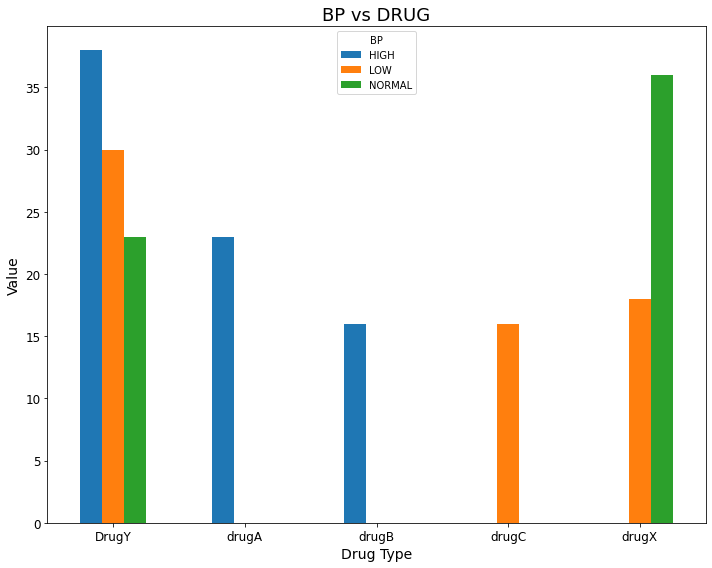

In [105]:
bp_drug_pivot = pd.pivot_table(bp_drug , values = 'value_count' , columns='BP' , index = 'Drug')
bp_drug_pivot.plot(kind='bar' ,figsize = (10,8) , fontsize = 12, rot= 360)
plt.xlabel('Drug Type', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.title("BP vs DRUG", fontsize= 18 )
plt.tight_layout()
plt.show()

# Visualize Na_to_K and Drug


     Na_to_K   Drug
0     25.355  DrugY
1     13.093  drugC
2     10.114  drugC
3      7.798  drugX
4     18.043  DrugY
..       ...    ...
195   11.567  drugC
196   12.006  drugC
197    9.894  drugX
198   14.020  drugX
199   11.349  drugX

[200 rows x 2 columns]
Drug
DrugY    22.374780
drugA    10.918783
drugB    11.524375
drugC    10.633750
drugX    10.650556
Name: Na_to_K, dtype: float64


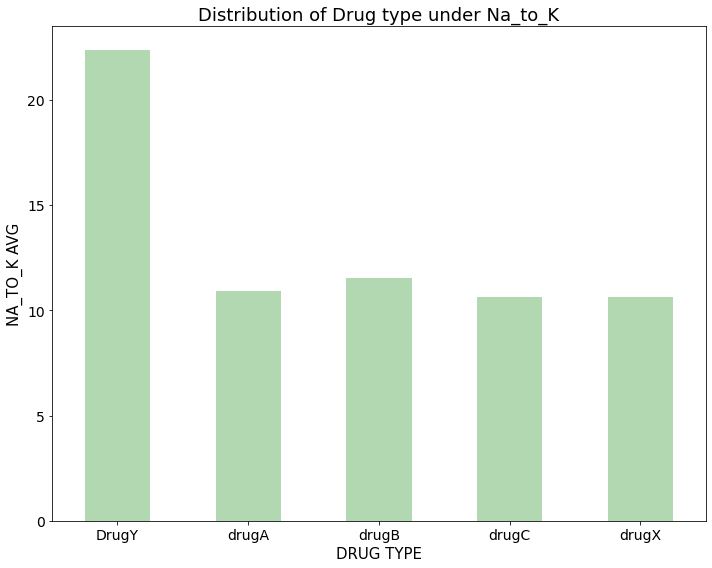

In [106]:
print(drugs_df[['Na_to_K','Drug']])
drug_na_k= drugs_df.groupby(['Drug'])['Na_to_K'].mean()
print(drug_na_k)

drug_na_k.plot(kind = 'bar' , color = 'green', alpha = 0.3, rot = 360 ,fontsize =  14 , figsize = (10,8)) 
plt.xlabel('DRUG TYPE' , fontsize=15)
plt.ylabel('NA_TO_K AVG' , fontsize=15)
plt.title('Distribution of Drug type under Na_to_K', fontsize = 18)
plt.tight_layout()
plt.show()


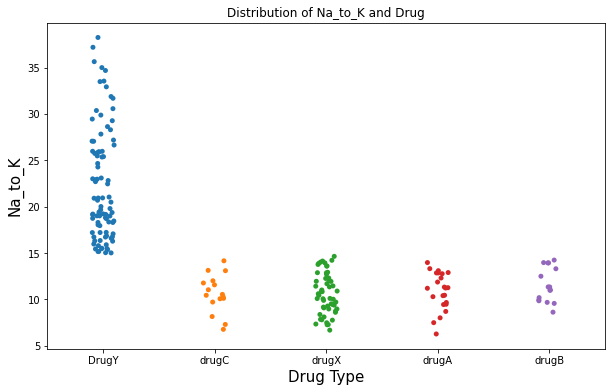

In [107]:
# visulaize na to k and drug type using stripplot 
plt.figure(figsize = (10,6))
#Plotting a swarmplot to get a distribution and categorial an numerical variables 
sns.stripplot(x = "Drug", y = "Na_to_K", data = drugs_df )
plt.xlabel("Drug Type" , fontsize = 15)
plt.ylabel("Na_to_K" , fontsize = 15)
plt.title("Distribution of Na_to_K and Drug")
plt.show()

### Encoding and  categorical features 

In [129]:
from sklearn.model_selection import train_test_split

In [131]:
np.random.seed(123)
y_df = drugs_train_df['Drug']
x_df = drugs_train_df.drop(['Drug'],axis= 1)
x_train,x_test,y_train,y_test= train_test_split(x_df , y_df,test_size=0.33,random_state=101)
print('X train shape : ', x_train.shape)
print('X test shape : ', x_test.shape)
print('Y train shape : ', y_train.shape)
print('Y test shape : ', y_test.shape)


X train shape :  (134, 5)
X test shape :  (66, 5)
Y train shape :  (134,)
Y test shape :  (66,)


In [166]:
drugs_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [132]:
x_df

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,3,3,25.355
1,47,1,1,3,13.093
2,47,1,1,3,10.114
3,28,0,2,3,7.798
4,61,0,1,3,18.043
...,...,...,...,...,...
195,56,0,1,3,11.567
196,16,1,1,3,12.006
197,52,1,2,3,9.894
198,23,1,2,2,14.020


In [148]:
y_df

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
lr= LogisticRegression()

In [135]:
lr=  LogisticRegression()
lr.fit(x_train,y_train)
x_train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Age,Sex,BP,Cholesterol,Na_to_K
154,37,1,1,2,16.724
114,20,0,2,2,9.281
118,32,0,3,2,10.292
64,60,0,3,3,13.303
165,38,1,1,3,18.295
...,...,...,...,...,...
63,45,1,1,2,8.370
70,70,1,3,3,13.967
81,64,1,2,3,7.761
11,34,0,3,2,19.199


In [136]:
pred = lr.predict(x_test)
pred


array(['DrugY', 'DrugY', 'drugB', 'DrugY', 'drugA', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'drugB', 'drugX', 'drugX', 'drugA', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX', 'drugA', 'DrugY',
       'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'drugX', 'drugB',
       'drugA', 'DrugY', 'drugX', 'drugX', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'drugX',
       'drugA', 'DrugY', 'DrugY', 'drugB', 'drugX', 'DrugY', 'drugX',
       'DrugY', 'drugA', 'DrugY'], dtype=object)

In [137]:
# getscore
train_score =  lr.score(x_train,y_train)
test_score =  lr.score(x_test,y_test)


In [138]:
print('train score : {:.2f}'.format(train_score))
print('test score : {:.2f}'.format(test_score))

train score : 0.84
test score : 0.76


In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn=KNeighborsClassifier()

In [155]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [157]:
acc=accuracy_score(y_test,pred)
print('Accuracy : {:.2f}'.format(acc))

Accuracy : 0.76


In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
from sklearn.metrics import classification_report

#### Confusion matrix

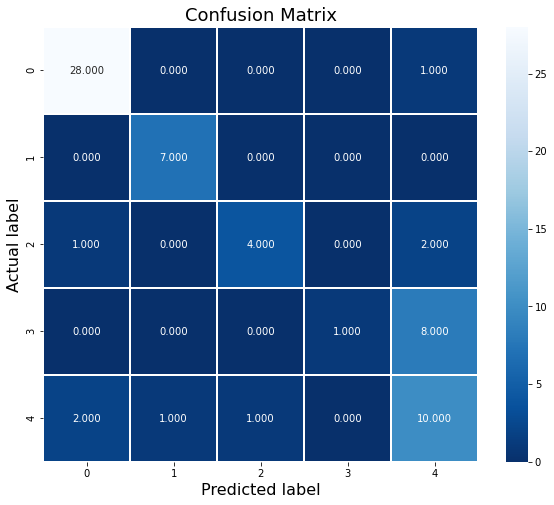

In [140]:
cm= confusion_matrix(y_test,pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,annot=True , fmt=".3f", linewidths=.5,square= True, cmap="Blues_r")
plt.ylabel('Actual label', fontsize = 16)
plt.xlabel('Predicted label', fontsize = 16)
plt.title("Confusion Matrix", fontsize =18)
plt.show()

In [141]:
# classification report 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       DrugY       0.90      0.97      0.93        29
       drugA       0.88      1.00      0.93         7
       drugB       0.80      0.57      0.67         7
       drugC       1.00      0.11      0.20         9
       drugX       0.48      0.71      0.57        14

    accuracy                           0.76        66
   macro avg       0.81      0.67      0.66        66
weighted avg       0.81      0.76      0.73        66



###### recall = tp/tp+fn 
###### precission= tp/tp+fp 
###### CLASSSIFICATION ERROR AND MISCLASSIFICATION RATE
###### ACCURACY = TP+FP/TP+TN+FP+FN

###### CLASSIFICATION ERROR = FP+FN/TP+TN+FP+FN

In [142]:
#get accuracy score
acc = accuracy_score(y_test,pred)
print('Accuracy : {:.2f}'.format(acc))
class_err = 1 - acc
print("misclassification rate : {:.2f}".format(class_err))

Accuracy : 0.76
misclassification rate : 0.24


The misclassification rate is quite low and this makes the modelm a decent predictor of different drug type. 
we can also improve the model performabnce by performing hyperparameter tuning using gridsearchCV, but that will be useful on a bigger dataset 
with more features ., 
using other classifier model will be surplflous for this dataset with limited features and can ve attempted easily as an exercise

In [143]:
import pickle


In [144]:
pickle.dump(lr,open("DRUGS CLASSIFICATION.pkl",'wb'))

In [145]:
loadedModel = pickle.load(open("DRUGS CLASSIFICATION.pkl",'rb'))
loadedModel

LogisticRegression()

In [146]:
loadedModel.predict([[23,0,3,3,35]])

array(['DrugY'], dtype=object)

In [147]:
loadedModel.predict_proba([[23,0,3,3,35]])

array([[9.99995545e-01, 7.83324159e-09, 2.29954699e-10, 2.45634429e-10,
        4.44641523e-06]])